Grant Waldow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/CS760/HW4

/content/drive/MyDrive/CS760/HW4


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import os

# Q 3.1

In [5]:
def read_language_files(language_prefix):
    texts = []
    for i in range(10):
        filename = os.path.join(language_prefix + str(i) + ".txt")
        with open(filename, 'r', encoding='utf-8') as file:
            texts.append(file.read())
    return texts

e_texts = read_language_files("e")
j_texts = read_language_files("j")
s_texts = read_language_files("s")

# Calculate the prior probabilities w/ additive smoothing
alpha = 0.5 #1/2
K = 3 # e,j,s
N_e = len(e_texts)
N_j = len(j_texts)
N_s = len(s_texts)
N = N_e + N_j + N_s
p_e = (N_e + alpha) / (N + K * alpha)
p_j = (N_j + alpha) / (N + K * alpha)
p_s = (N_s + alpha) / (N + K * alpha)

# going to do calculations with log probs. for accuracy, but will report non-log probabilities
log_p_e = math.log(p_e)
log_p_j = math.log(p_j)
log_p_s = math.log(p_s)

print(f"Prior Prob. for English: {p_e}")
print(f"Prior Prob. for Japanese: {p_j}")
print(f"Prior Prob. for Spanish: {p_s}")

Prior Prob. for English: 0.3333333333333333
Prior Prob. for Japanese: 0.3333333333333333
Prior Prob. for Spanish: 0.3333333333333333


Q 3.2

In [6]:
import numpy as np

def compute_class_conditional_probabilities(texts):
    character_counts = np.zeros(27)
    char_to_index = {char: idx for idx, char in enumerate("abcdefghijklmnopqrstuvwxyz ")}

    # Count occurrences
    for text in texts:
        for char in text:
            if char in char_to_index:
                character_counts[char_to_index[char]] += 1

    # Class-conditional probabilities with additive smoothing
    total_chars = np.sum(character_counts)
    theta = (character_counts + alpha) / (total_chars + 27 * alpha) # V = 27

    return theta # np array containing class-cond. probabilities

theta_e = compute_class_conditional_probabilities(e_texts)
theta_j = compute_class_conditional_probabilities(j_texts)
theta_s = compute_class_conditional_probabilities(s_texts)

print("Class-conditional probabilities for English:")
for idx, char in enumerate("abcdefghijklmnopqrstuvwxyz "):
    print(f"{char}: {theta_e[idx]}")


Class-conditional probabilities for English:
a: 0.0601685114819098
b: 0.011134974392863043
c: 0.021509995043779945
d: 0.021972575582355856
e: 0.1053692383941847
f: 0.018932760614571286
g: 0.017478936064761277
h: 0.047216256401784236
i: 0.055410540227986124
j: 0.001420783082768875
k: 0.0037336857756484387
l: 0.028977366595076822
m: 0.020518751032545846
n: 0.057921691723112505
o: 0.06446390219725756
p: 0.01675202378985627
q: 0.0005617049396993227
r: 0.053824549810011564
s: 0.06618205848339666
t: 0.08012555757475633
u: 0.026664463902197257
v: 0.009284652238559392
w: 0.015496448042293078
x: 0.001156451346439782
y: 0.013844374690236246
z: 0.0006277878737815959
 : 0.1792499586981662


# Q 3.3

In [7]:
print("Class-conditional probabilities for Spanish:")
for idx, char in enumerate("abcdefghijklmnopqrstuvwxyz "):
    print(f"{char}: {theta_s[idx]}")


Class-conditional probabilities for Spanish:
a: 0.10456045141993771
b: 0.008232863618143134
c: 0.03752582405722919
d: 0.039745922111559924
e: 0.1138108599796491
f: 0.00860287996053159
g: 0.0071844839813758445
h: 0.0045327001942585795
i: 0.049859702136844375
j: 0.006629459467793161
k: 0.0002775122567913416
l: 0.052943171656748174
m: 0.02580863988159477
n: 0.054176559464709693
o: 0.07249236841293824
p: 0.02426690512164287
q: 0.007677839104560451
r: 0.05929511886774999
s: 0.06577040485954797
t: 0.03561407295488884
u: 0.03370232185254849
v: 0.00588942678301625
w: 9.250408559711388e-05
x: 0.0024976103111220747
y: 0.007862847275754679
z: 0.0026826184823163022
 : 0.16826493170115014


In [8]:
print("Class-conditional probabilities for Japanese:")
for idx, char in enumerate("abcdefghijklmnopqrstuvwxyz "):
    print(f"{char}: {theta_j[idx]}")

Class-conditional probabilities for Japanese:
a: 0.1317656102589189
b: 0.010866906600510151
c: 0.005485866033054963
d: 0.01722631818022992
e: 0.06020475907613823
f: 0.003878542227191726
g: 0.014011670568503443
h: 0.03176211607673224
i: 0.09703343932352633
j: 0.0023411020650616725
k: 0.05740941332681086
l: 0.001432614696530277
m: 0.03979873510604843
n: 0.05671057688947902
o: 0.09116321324993885
p: 0.0008735455466648031
q: 0.00010482546559977637
r: 0.04280373178657535
s: 0.0421747789929767
t: 0.056990111464411755
u: 0.07061742199238269
v: 0.0002445927530661449
w: 0.01974212935462455
x: 3.4941821866592126e-05
y: 0.01415143785596981
z: 0.00772214263251686
 : 0.12344945665466997


# Q 3.4

In [9]:
vocabulary = list('abcdefghijklmnopqrstuvwxyz ')
count_vector = np.zeros(27, dtype=int)

with open("e10.txt", "r") as f:
    content = f.read().lower()

# count the chars
for char in content:
    if char in vocabulary:
        index = vocabulary.index(char)
        count_vector[index] += 1

print(count_vector)


[164  32  53  57 311  55  51 140 140   3   6  85  64 139 182  53   3 141
 186 225  65  31  47   4  38   2 498]


In [12]:
x = count_vector

log_likelihood_e = np.sum(x * np.log(theta_e))
log_likelihood_j = np.sum(x * np.log(theta_j))
log_likelihood_s = np.sum(x * np.log(theta_s))

# If you need the actual likelihoods, you can exponentiate the log-likelihoods:
likelihood_e = np.exp(log_likelihood_e)
likelihood_j = np.exp(log_likelihood_j)
likelihood_s = np.exp(log_likelihood_s)

print("Log Likelihood for English:", log_likelihood_e)
print("Log Likelihood for Japanese:", log_likelihood_j)
print("Log Likelihood for Spanish:", log_likelihood_s)

Log Likelihood for English: -7841.865447060635
Log Likelihood for Japanese: -8771.433079075032
Log Likelihood for Spanish: -8467.282044010557


In [14]:
def read_language_files_10_to_19(language_prefix):
    texts = []
    for i in range(10, 20):
        filename = os.path.join(language_prefix + str(i) + ".txt")
        with open(filename, 'r', encoding='utf-8') as file:
            texts.append(file.read())
    return texts

e_test_texts = read_language_files_10_to_19("e")
j_test_texts = read_language_files_10_to_19("j")
s_test_texts = read_language_files_10_to_19("s")

# lump them together
all_test_texts = e_test_texts + j_test_texts + s_test_texts
true_labels = [0]*10 + [1]*10 + [2]*10  # making label list

def classify_text(text, thetas, priors):
    count_vector = np.zeros(27, dtype=int)
    # get the count vector for each doc
    for char in text:
        if char in vocabulary:
            index = vocabulary.index(char)
            count_vector[index] += 1
    log_likelihoods = [np.sum( count_vector * np.log(theta)) + prior for theta, prior in zip(thetas, priors)]
    return np.argmax(log_likelihoods)

# Compute confusion matrix
confusion_matrix = np.zeros((3, 3))
for text, true_label in zip(all_test_texts, true_labels):
    predicted_label = classify_text(text, [theta_e, theta_j, theta_s], [log_p_e, log_p_j,log_p_s]) # make sure to pass in priors as log priors here
    confusion_matrix[predicted_label, true_label] += 1

print(confusion_matrix)
total_docs = confusion_matrix.sum()
correct_preds = np.diag(confusion_matrix).sum()
accuracy = correct_preds / total_docs
print("Accuracy:", accuracy)


[[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]
Accuracy: 1.0


# Q 4.2

In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load MNIST from the package
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255 # we'll use 5:1 train:test
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels) # should be fine to use this for data prep
test_labels = to_categorical(test_labels)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)
# ==================================================

# Forward pass (just matrix mult.s)
def forward(x, W1, W2):
    h = sigmoid(np.dot(x, W1.T))
    y = softmax(np.dot(h, W2.T))
    return h, y

# Hyperparameters
lr = 0.001
epochs = 10
batch_size = 128 # setting this to 1 = SGD
d = train_images.shape[1]
d1 = 128  # using 128 nodes in the hidden layer
k = 10  # mnist has 10 classes

# Init weights to very small values (but not explicitly 0s)
W1 = np.random.randn(d1, d) * 0.01
W2 = np.random.randn(k, d1) * 0.01

# for plotting
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training
for epoch in range(epochs):
    for i in range(0, train_images.shape[0], batch_size):
        # using the minibatches instead of the whole dataset for each update
        x_batch = train_images[i:i+batch_size]
        y_batch = train_labels[i:i+batch_size]
        # = forward =
        h, y_pred = forward(x_batch, W1, W2)
        # = backward =
        # Compute gradients
        dL_dz = y_pred - y_batch
        dL_dW2 = np.dot(dL_dz.T, h)
        dh = np.dot(dL_dz, W2)
        da = dh*h*(1-h)
        dL_dW1 =np.dot(da.T, x_batch)
        # Update weights
        W2 -= lr * dL_dW2
        W1 -= lr * dL_dW1
    # Eval
    _, train_pred = forward(train_images, W1, W2)
    _, test_pred = forward(test_images, W1, W2)
    train_loss = -np.mean(train_labels * np.log(train_pred + 1e-10))
    test_loss = -np.mean(test_labels * np.log(test_pred + 1e-10))
    train_accuracy = np.mean(np.argmax(train_pred, axis=1) == np.argmax(train_labels, axis=1))
    test_accuracy = np.mean(np.argmax(test_pred, axis=1) == np.argmax(test_labels, axis=1))
    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}')

    # store losses and acc's
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


Epoch 1/10, Training Loss: 0.0705, Test Loss: 0.0691, Train Acc: 0.8155, Test Acc: 0.8152
Epoch 2/10, Training Loss: 0.0432, Test Loss: 0.0417, Train Acc: 0.8798, Test Acc: 0.8857
Epoch 3/10, Training Loss: 0.0361, Test Loss: 0.0347, Train Acc: 0.8974, Test Acc: 0.8998
Epoch 4/10, Training Loss: 0.0326, Test Loss: 0.0314, Train Acc: 0.9056, Test Acc: 0.9089
Epoch 5/10, Training Loss: 0.0304, Test Loss: 0.0293, Train Acc: 0.9121, Test Acc: 0.9146
Epoch 6/10, Training Loss: 0.0287, Test Loss: 0.0278, Train Acc: 0.9168, Test Acc: 0.9198
Epoch 7/10, Training Loss: 0.0273, Test Loss: 0.0265, Train Acc: 0.9209, Test Acc: 0.9241
Epoch 8/10, Training Loss: 0.0261, Test Loss: 0.0254, Train Acc: 0.9248, Test Acc: 0.9269
Epoch 9/10, Training Loss: 0.0250, Test Loss: 0.0244, Train Acc: 0.9283, Test Acc: 0.9294
Epoch 10/10, Training Loss: 0.0240, Test Loss: 0.0235, Train Acc: 0.9314, Test Acc: 0.9327


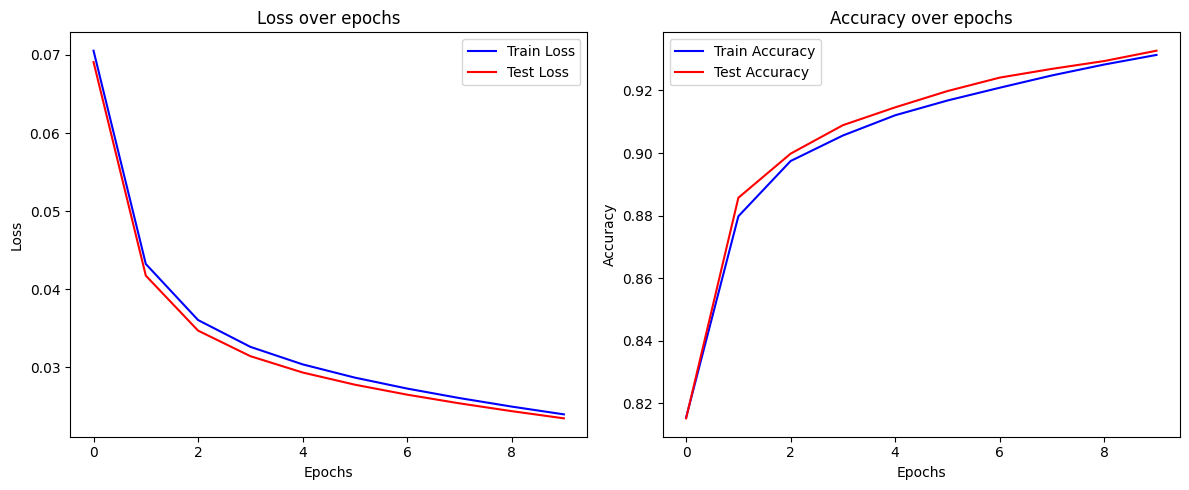

In [23]:
import matplotlib.pyplot as plt

# Plot losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='red')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', color='blue')
plt.plot(test_accuracies, label='Test Accuracy', color='red')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10, Training Loss: 0.7451, Test Loss: 0.2780, Test Acc: 91.62%
Epoch 2/10, Training Loss: 0.2379, Test Loss: 0.2075, Test Acc: 93.56%
Epoch 3/10, Training Loss: 0.1665, Test Loss: 0.1305, Test Acc: 95.92%
Epoch 4/10, Training Loss: 0.1292, Test Loss: 0.2047, Test Acc: 93.37%
Epoch 5/10, Training Loss: 0.1049, Test Loss: 0.0992, Test Acc: 96.89%
Epoch 6/10, Training Loss: 0.0888, Test Loss: 0.1934, Test Acc: 94.07%
Epoch 7/10, Training Loss: 0.0757, Test Loss: 0.0784, Test Acc: 97.36%
Epoch 8/10, Training Loss: 0.0644, Test Loss: 0.0780, Test Acc: 97.47%
Epoch 9/10, Training Loss: 0.0568, Test Loss: 0.2025, Test Acc: 93.72%
Epoch 10/10, Training Loss: 0.0501, Test Loss: 0.1177, Test Acc: 96.14%


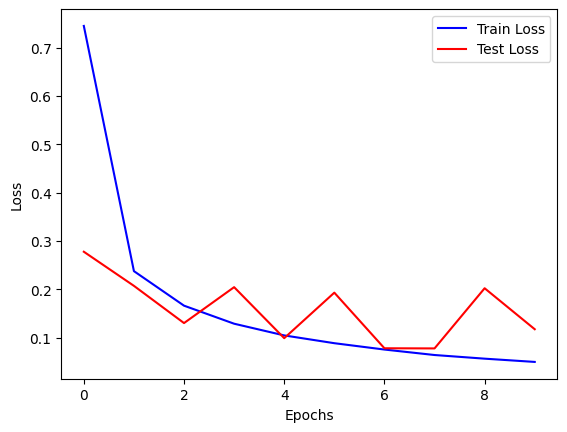

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the neural network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 300)
        self.fc2 = nn.Linear(300, 200)
        self.fc3 = nn.Linear(200, 10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Initializations we need to do
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.5, momentum=0)

epochs = 10
train_losses, test_losses = [], []

for epoch in range(epochs):
    train_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.view(-1, 28*28)  # reshape
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(-1, 28*28)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Acc: {100. * correct / total:.2f}%')

# Plot learning curve
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
